## Script 1: First steps in visualizing and processing the EEG data

In this script you will be introduced to the basics of visualizing and manipulating EEG data using
MNE-Python package.

Reading /Users/bolger/PycharmProjects/DSC2024-EEG-Jupyter/data/sub-001_eeg_sub-001_task-think1_eeg_short.fdt
Reading 0 ... 51200  =      0.000 ...    50.000 secs...
Using matplotlib as 2D backend.


/var/folders/60/tv1lj_b10zq7ypz5s1kvq4_cr3bc6f/T/ipykernel_4023/992375629.py:13: RuntimeWarning: Unknown types found, setting as type EEG:
ppg: ['Plet']
temp: ['Temp']
  rawIn = mne.io.read_raw_eeglab(fullpath, preload=True)
/var/folders/60/tv1lj_b10zq7ypz5s1kvq4_cr3bc6f/T/ipykernel_4023/992375629.py:13: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  rawIn = mne.io.read_raw_eeglab(fullpath, preload=True)
/var/folders/60/tv1lj_b10zq7ypz5s1kvq4_cr3bc6f/T/ipykernel_4023/992375629.py:13: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  rawIn = mne.io.read_raw_eeglab(fullpath, preload=True)
/var/folders/60/tv1lj_b10zq7ypz5s1kvq4_cr3bc6f/T/ipykernel_4023/992375629.py:13: RuntimeWarning: Not setting positions of 13 gsr/misc/resp channels found in montage:
['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'GSR1', 'GSR2', 'Erg1', 'Erg2', 'Resp']

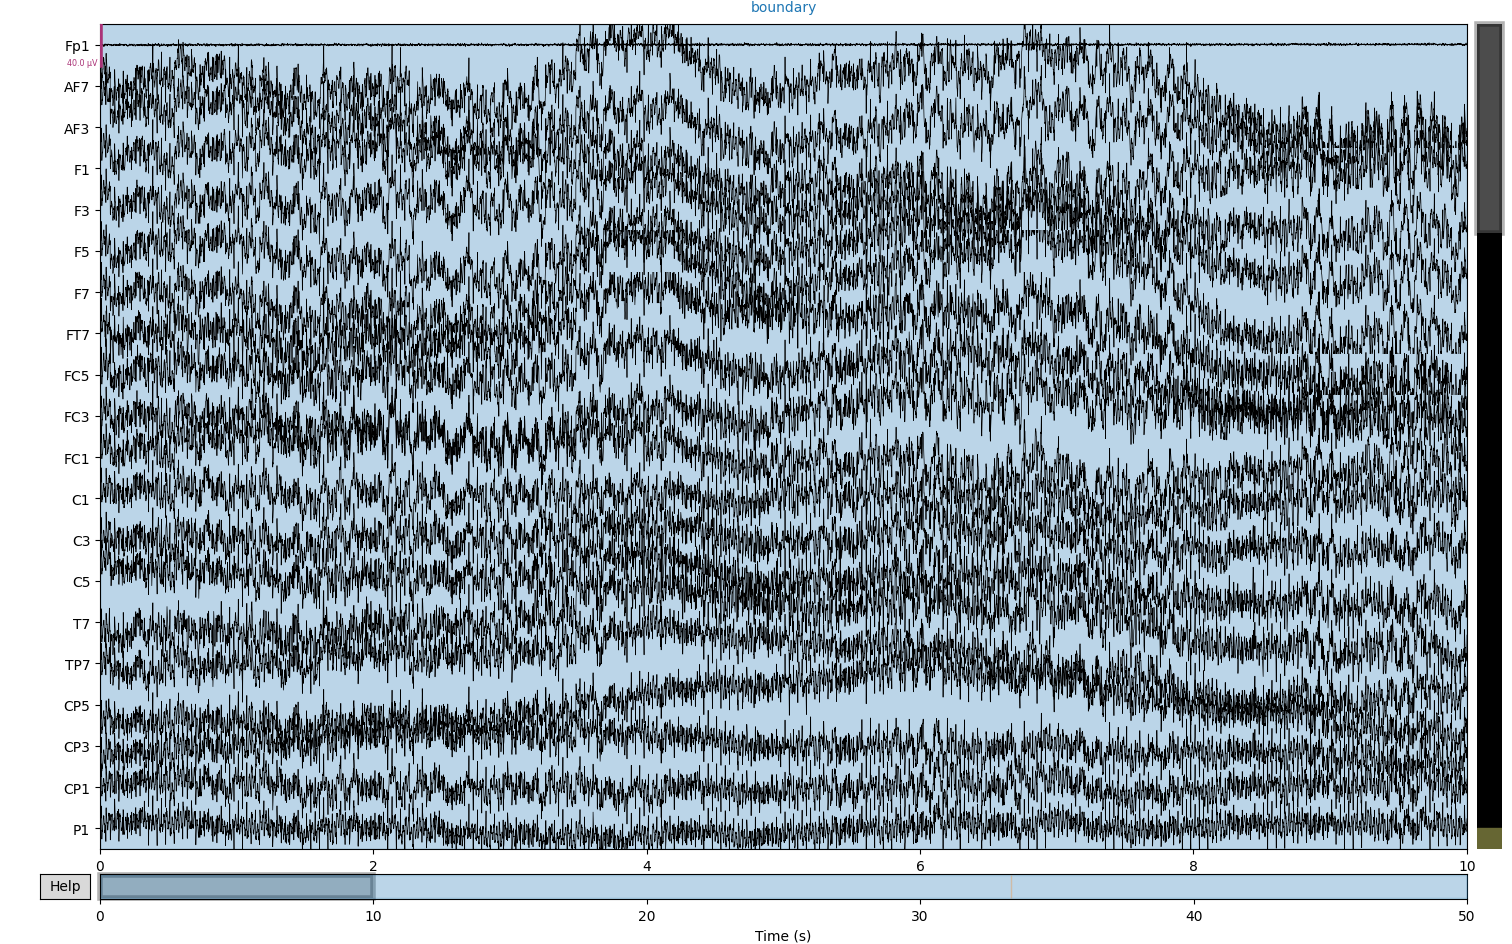

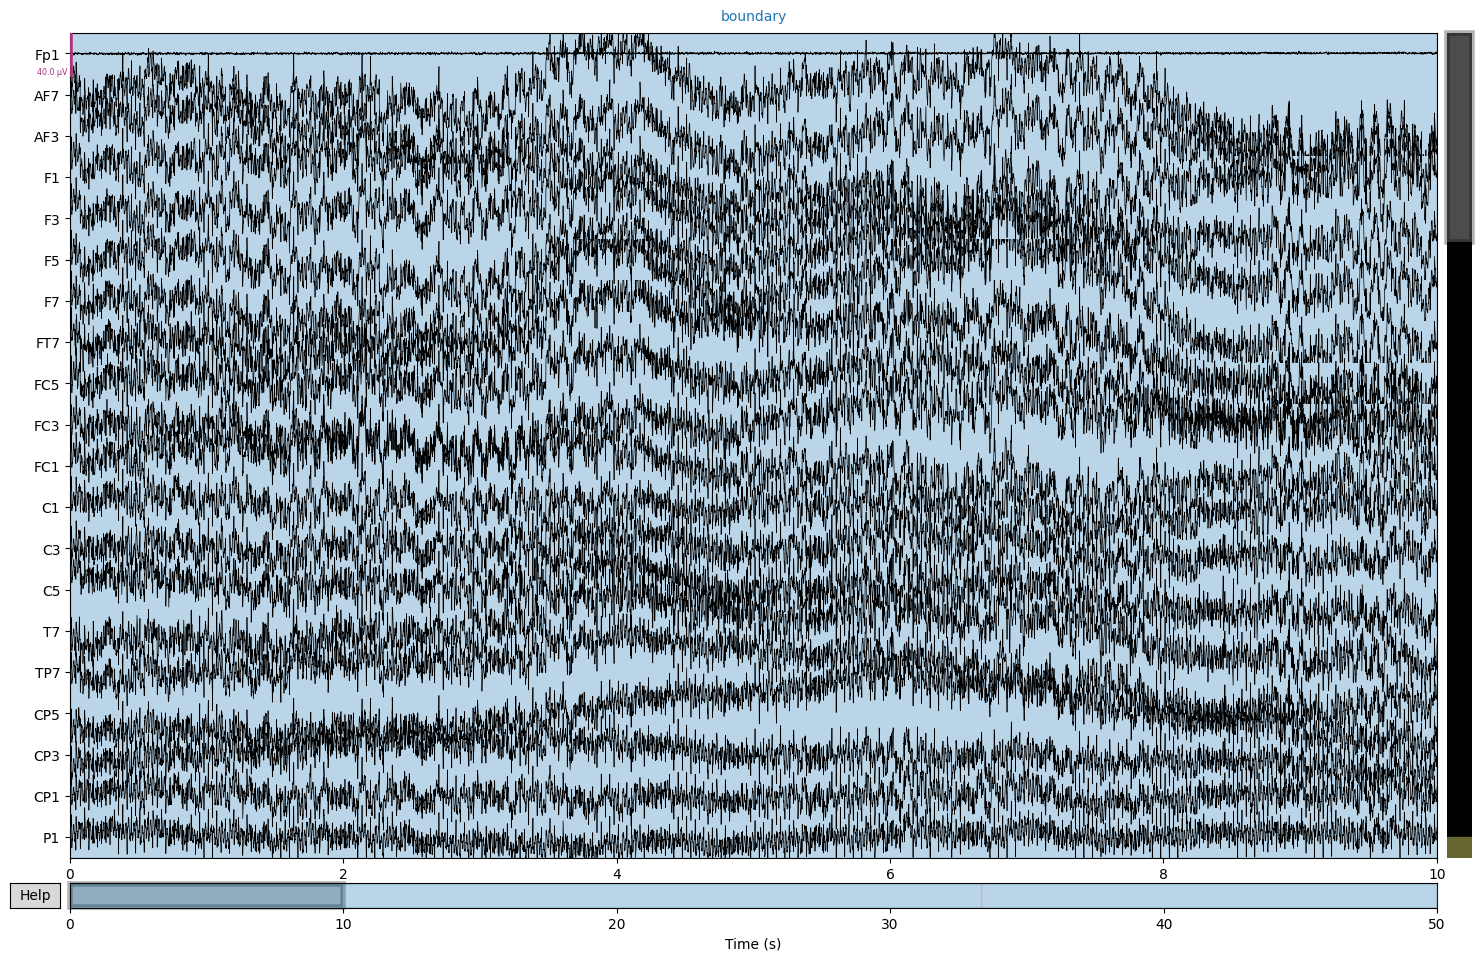

In [1]:
## Load in the necessary packages, read in the raw EEG data (in bdf format) and visualize the raw data.
## Note when we load in the data using mne.io.read_raw_bdf() this creates a raw object. 
## In the following code, our raw object is rawIn.
%matplotlib widget
import mne
import matplotlib.pyplot as plt
import os
import numpy as np

fname = 'sub-001_eeg_sub-001_task-think1_eeg_short.set'
filepath = 'data'
fullpath = os.path.join(filepath, fname)
rawIn = mne.io.read_raw_eeglab(fullpath, preload=True)

rawIn.plot()

### A note concerning the external EEG electrodes or channels of the data that you have just imported.

EXG1 and EXG2: HEOG (horizontal electrooculogram)
EXG3 and EXG4: VEOG (vertical electrooculogram or eye-blinks)
EXG7: ECG (electro-cardiogram)
EXG5: Mastoid 1
EXG6: Mastoid 2
EXG8: Fp1 electrode

Now we will set the auxiliary channels to type MISC, EXG1-6 to eog and the stimulus channel to 'stim'
By doing this each data type is scaled appropriately when visualized. 

In [ ]:
my_dict = {'EXG1': 'eog', 'EXG2': 'eog', 'EXG3': 'eog', 'EXG4': 'eog', 'EXG5': 'eog', 'EXG6': 'eog', 'EXG7': 'eog',
           'EXG8': 'eog',
           'GSR1': 'misc', 'GSR2': 'misc', 'Erg1': 'stim', 'Erg2': 'stim', 'Resp': 'resp', 'Plet': 'misc',
           'Temp': 'misc'}
print(my_dict)
rawIn.set_channel_types(my_dict)  # Apply the channel type to our raw object.
mne.viz.plot_raw(rawIn, duration=5.0, scalings="auto", remove_dc=True)  # Plot again the Channels X Time

### Getting some basic dataset information from the .info() object.

Now we will extract some basic information about the dataset by looking at the rawIn.info attribute,
which contains an 'info' object. This info object is a python dictionary. 

In [ ]:
rawIn.info['sfreq']         # To access the sampling frequency information 
print(rawIn.info)           # Visualising all dataset information
print(rawIn.info['sfreq'])  # Display the sampling frequency

### Exercise 1

Try displaying the following information in the console:
- channel names
- the number and the type of channels
Put the code below.


In [ ]:
# We can pass the information in the info object to a new variable.

sfreq = rawIn.info['sfreq']      # We are assigning our sampling frequency information to the variable sfreq
print('The sampling frequency of the current dataset is {} Hz.'.format(sfreq))  # using .format() method to print variable.

## Now we extract the actual microVolt EEG data from the rawIn object.

We use the .get_data() method. 
This should give us a matrix with the form: number of electrodes X number of time points

In [ ]:
dataIn = rawIn.get_data()
dataDims = dataIn.shape      # To get the dimensions of our data. 
print(f'The number of channels in the current raw dataset is {dataDims[0]}.\n')
print(f'The number of time samples in the current raw dataset is {dataDims[1]}.\n')

### Plot a single electrode

1. Plot a single electrode over the entire duration of the data. 
We can use the time vector (T) that we constructed.

2. Plot a single electrode over a defined time interval. 
3. Plot several electrodes against each other. 

In the following example we will plot the EEG signal of the Cz electrode over time.

In [ ]:
channelNames = rawIn.info['ch_names']
chan2plot = 'Cz'
chanIndx = channelNames.index(chan2plot)
print(f'The index of channel {chan2plot} is {chanIndx}.')

plt.plot(T, dataIn[chanIndx, :])
plt.xlabel('time (seconds)')
plt.show()

In [ ]:
# Plot a single electrode over a pre-defined time interval (60 to 70seconds after the start of the data)

timeLims = np.array([60, 70])
lim1, lim2 = (timeLims * sfreq).astype(int)   # Express the time limits of the interval as indices.

# Plot
plt.plot(T[lim1:lim2], dataIn[chanIndx, lim1:lim2])
plt.xlabel('time (seconds)')
plt.show()

In [ ]:
# Plot two electrodes against each other

chans2plot = ['Cz', 'Pz']
channelIndices = [i for i, chan in enumerate(channelNames) if chan in chans2plot]

fig, ax = plt.subplots()
for idx in channelIndices:
    ax.plot(T[lim1:lim2], dataIn[idx, lim1:lim2])
ax.set_xlabel('time (seconds)')
plt.show()

You can notice that the two electrode signals do not at all overlap. 
Why could this be?

### The DC Component or the 0Hertz Component

The DC Offset:
You notice that none of the electrodes appear to be visible...this is due to what we call the "**DC Offset**".
The acquisition system works on battery, so DC, and it captures ALL the frequencies including the OHz.
The OHz is the offset from zero mean. 
So we need to remove this offset; after which our signals will have a zero mean.

There are different ways of removing the DC Offset:

We will start by trying to remove the DC offset, by subtracting the mean activity from the activity of one channel.
Then we will plot the result.
So...
- Let's calculate the mean of a few channels.
- What do you notice about the means? How do we know that there is a DC offset?

Note also the use of the *copy()** method. We use this to make a copy of the original **RawIn** object.
When we apply a method such as, *.pick_channels*, to a raw object, we change that object. Therefore, the copy() method is very useful.

In [ ]:
rawInbis = rawIn.copy()  # creating a copy of the raw object.
rawInbis.pick_channels(['Fz', 'Cz', 'Pz'])
dataInbis = rawInbis.get_data()  # Get the data of the selected channels.
dataMean = np.mean(dataInbis, 1)
dataMean = dataMean.tolist()

In [ ]:
# Now plot the channels before and after subtracting the mean.
ax1 = plt.subplot(231)
ax1.margins(0.5)
ax1.plot(T, dataIn[0,])

ax2 = plt.subplot(232)
ax2.margins(0.5)
ax2.plot(T, dataIn[1,])

ax3 = plt.subplot(233)
ax3.margins(0.5)
ax3.plot(T, dataIn[2,])

ax4 = plt.subplot(234)
ax4.margins(0.5)
ax4.plot(T, chan_demean1)

ax5 = plt.subplot(235)
ax5.margins(0.5)
ax5.plot(T, chan_demean2)

ax6 = plt.subplot(236)
ax6.margins(0.5)
ax6.plot(T, chan_demean3)

### Remove the DC component by high-pass filtering.

The generally applied approach in EEG data processing is to apply a high-pass filter to the EEG data.
Remember we want to remove the 0Hz, DC component.
Here we apply a high-pass filter with a cutoff at 0.1Hz. This means that we remove all frequencies below 0.1Hz and retain all 
frequencies above 0.1Hz. 
We will use the .filter() method in MNE.

In [ ]:
rawInFilt = rawIn.copy().filter(0.1, None,
                                fir_design='firwin')  # Notice that we created a copy of the origin rawIn data before filtering.

mne.viz.plot_raw(rawInFilt, scalings='auto', remove_dc=False)  # Visualize in Channels X Time format.

### Rereferencing the data 

The data needs to be re-referenced. A reference needs to be chosen.
The potential measured in microVolts is always measured in relation to the potential at another point, called the reference.

This means that the activity at each channel is interpreted relative to the potential at a reference.
- the reference can be the mean activity of all electrodes.
- the average of the two mastoids (generally these reference channels are marked as Ref1, Ref2 or EXG1, EXG2)
The current dataset does not have the external (EXG) channels, so we will apply an average reference.

However, we cannot include the bad channels or the VEOG when applying the reference.
We use the *pick_types()* method to exclude these channels when applying the average reference.

Here we will re-reference in relation to the average of all scalp electrodes, excluding any electrodes that have been
marked as being noisy. 
Other options for the reference are the mastoids (M1, M2).


In [ ]:
rawInRef = rawInFilt.copy().pick_types(eeg=True, exclude=['bads', 'eog']).set_eeg_reference(ref_channels='average')
mne.viz.plot_raw(rawInRef, scalings='auto', remove_dc=False)

### Finally we will save the highpass filtered and re-referenced data as a *.fif file (MNE-Python format)

In MNE-Python, when saving continuous data, the file name has to end _raw.fif.

<div class = "alert alert-block alert-info">
<b>Note:</b> If you are working in Binder, you do not need to do this step. The *.fif file is already available in the data folder.</div>

In [ ]:

fnameSave = 'sub-001_eeg_sub-001_task-think1_eeg_short_raw.fif'
fullpathSave = os.path.join(filepath, fnameSave)
rawInRef.save(fullpathSave)

### Manual annotation of the EEG data

We can manually annotate the EEG to mark eye-blinks, electrode-jumps, muscular artifacts.
We will open the interactive window. We define 'a' the key to press when we want to annotate the data.

In [ ]:
fig = rawIn.plot()
fig.fake_keypress('a')